In [1]:
import numpy as np
import pandas as pd

In [2]:
#Importando dataset
item_do_pedido = pd.read_csv('Datasets/olist_order_items_dataset.csv', sep=',', encoding='iso-8859-1')

In [3]:
#Selecionando colunas nas quais vou trabalhar
item = item_do_pedido[['product_id', 'seller_id', 'price']]

In [4]:
#Eliminando vendedores duplicados para melhor análise
item1 = item.drop_duplicates(subset=['seller_id'])

In [5]:
#Analisando os dados e vendo quais produtos se repetem
print(item1['product_id'].value_counts())

product_id
638a9114d65182d28b1cf8a99e72d90e    2
0f784f8f15179b9e101beb85796efc1a    2
c82a4bcc05f054e3084e20df4ee969cf    2
6cd51331a07b84149502aa6c9c5b536e    2
d285360f29ac7fd97640bf0baef03de0    2
                                   ..
826a5fa766c1c7241ffe63a2f3774d0b    1
17e7128a33dae59e32be411b7b4921b5    1
54b755678728b84472c2b654ac4de777    1
f7d5edd55cc83003c9ff58de184833d5    1
5ff4076c0f01eeba4f728c9e3fa2653c    1
Name: count, Length: 3069, dtype: int64


In [6]:
# Convertendo a Series em um DataFrame
df_counts = item1['product_id'].value_counts().to_frame()

# Renomeando a coluna contendo as contagens
df_counts = df_counts.rename(columns={'product_id': 'count'})

# Resetando o índice e transformando o índice (product_id) em uma coluna
df_counts.reset_index(inplace=True)

df_counts.head()

,product_id,count
0,638a9114d65182d28b1cf8a99e72d90e,2
1,0f784f8f15179b9e101beb85796efc1a,2
2,c82a4bcc05f054e3084e20df4ee969cf,2
3,6cd51331a07b84149502aa6c9c5b536e,2
4,d285360f29ac7fd97640bf0baef03de0,2


In [7]:
# Criando um novo DataFrame apenas com as linhas onde 'count' é igual a 2, assim consigo descobrir os itens que foram vendidos mais de uma vez
novo_df = df_counts[df_counts['count'] == 2]

novo_df.head()


,product_id,count
0,638a9114d65182d28b1cf8a99e72d90e,2
1,0f784f8f15179b9e101beb85796efc1a,2
2,c82a4bcc05f054e3084e20df4ee969cf,2
3,6cd51331a07b84149502aa6c9c5b536e,2
4,d285360f29ac7fd97640bf0baef03de0,2


In [8]:
#Relacionando o dataframe dos produtos com o dataframe que tenha informaçoes de preços e vendedores
produtos_sellers = pd.merge(novo_df, item1, on='product_id', how='inner')

In [9]:
#Como observado abaixo, temos pares de produtos identicos, vendidos por vendedores diferentes e seus respectivos preços
produtos_sellers.head(50)

,product_id,count,seller_id,price
0,638a9114d65182d28b1cf8a99e72d90e,2,1b65c144b17e607c0f37f10bb7dfec8d,159.90
1,638a9114d65182d28b1cf8a99e72d90e,2,a4b8d97cd5d3674eeff96abc99d8ed67,214.08
2,0f784f8f15179b9e101beb85796efc1a,2,92d14edfb62ee5ae7fdff70b0f4e7233,26.00
3,0f784f8f15179b9e101beb85796efc1a,2,bc8c8d665ec4664d286be0d521722b19,22.50
4,c82a4bcc05f054e3084e20df4ee969cf,2,8ca5b19e0263150d2c57afdde2b3d011,72.90
5,c82a4bcc05f054e3084e20df4ee969cf,2,e5d4b2b0c3bca22085f7a19a28de0c42,75.00
6,6cd51331a07b84149502aa6c9c5b536e,2,c33a5c3c983090c8b78a28e65052a20d,69.90
7,6cd51331a07b84149502aa6c9c5b536e,2,9dd59e43f0c9f0553244e8f9c2fb247e,55.00
8,d285360f29ac7fd97640bf0baef03de0,2,2eb70248d66e0e3ef83659f71b244378,154.91
9,d285360f29ac7fd97640bf0baef03de0,2,01ed254b9ff8407dfb9d99ba1e17d923,339.00


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

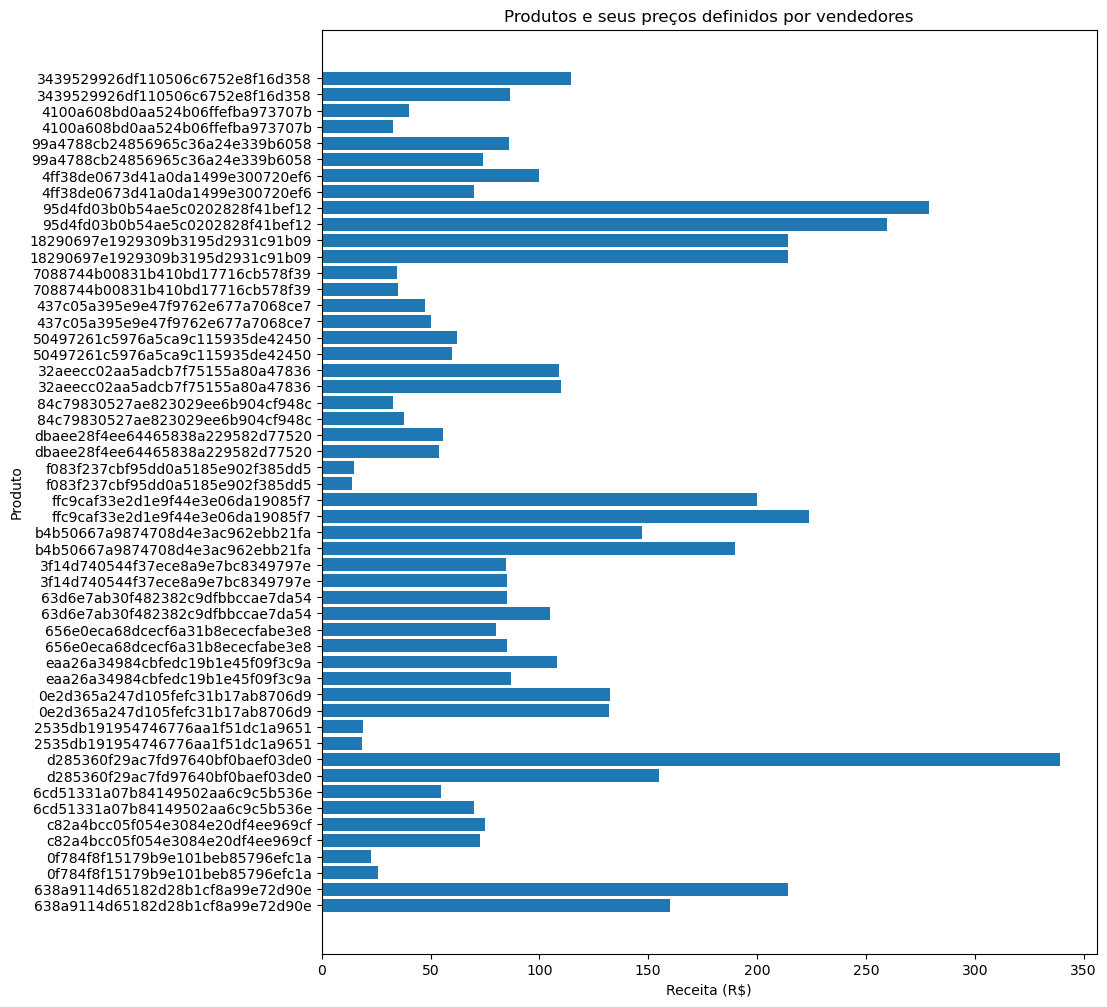

In [15]:
plt.figure(figsize=(10, 12))
plt.barh(produtos_sellers.index, produtos_sellers['price'])
plt.yticks(ticks=produtos_sellers.index, labels=produtos_sellers['product_id'])
plt.title('Produtos e seus preços definidos por vendedores')
plt.xlabel('Receita (R$)')
plt.ylabel('Produto')
plt.savefig('Produtos e seus preços definidos por vendedores')
plt.show()


In [16]:
# Agrupando o DataFrame pelo seller_id
grupo_vendedores = produtos_sellers.groupby('product_id')

# Calculando a variação dos preços para cada vendedor
variacoes_preco = grupo_vendedores['price'].apply(lambda x: x.max() - x.min())

# Transformando a série em DataFrame e renomeando a coluna
variacoes = pd.DataFrame(variacoes_preco).reset_index()
variacoes.columns = ['product_id', 'price']

variacoes.head(50)


,product_id,price
0,0e2d365a247d105fefc31b17ab8706d9,0.10
1,0f784f8f15179b9e101beb85796efc1a,3.50
2,18290697e1929309b3195d2931c91b09,0.00
3,2535db191954746776aa1f51dc1a9651,0.40
4,32aeecc02aa5adcb7f75155a80a47836,0.90
5,3439529926df110506c6752e8f16d358,27.88
6,3f14d740544f37ece8a9e7bc8349797e,0.01
7,4100a608bd0aa524b06ffefba973707b,6.91
8,437c05a395e9e47f9762e677a7068ce7,2.56
9,4ff38de0673d41a0da1499e300720ef6,30.00


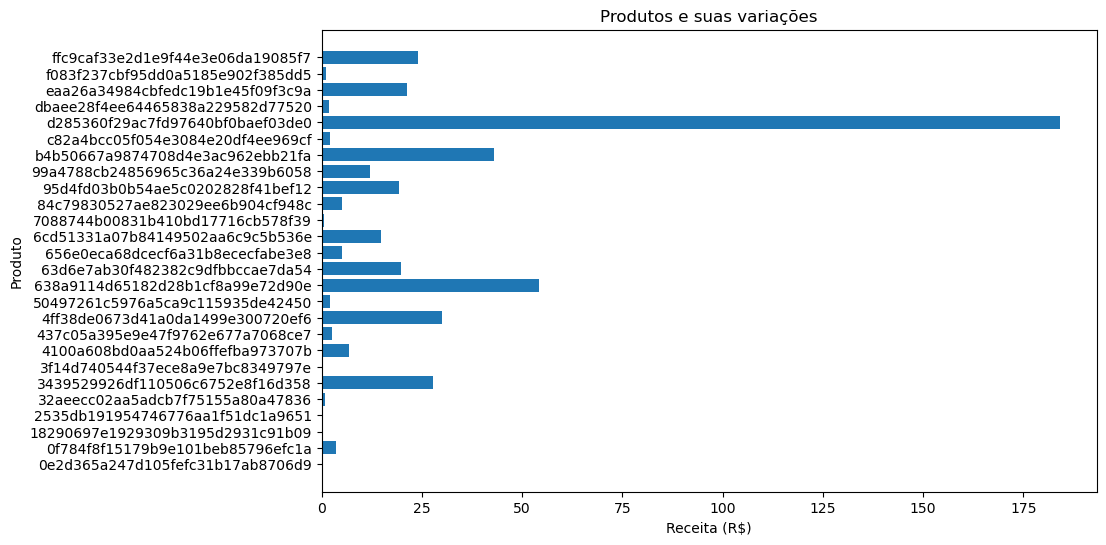

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(variacoes['product_id'], variacoes['price'])
plt.title('Produtos e suas variações')
plt.xlabel('Receita (R$)')
plt.ylabel('Produto')
plt.savefig('Produtos e suas variações')
plt.show()